Author: Hughes Perreault <br>
Inspired from: https://pytorch.org/docs/stable/torchvision/models.html

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/faster_rcnn_example.ipynb)

Import libraries

In [0]:
import torchvision.models
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import numpy as np
import urllib.request
from PIL import Image
from skimage import io

Constants

In [0]:
IMG_BASE_DIR = 'https://raw.githubusercontent.com/gabilodeau/INF6804/master/images'
IMG_NAMES = ['coffee0.jpg', 'coffee1.jpg', 'coffee2.jpg']
THRESHOLD = 0.95  # score threshold to display a detection box

Load model

In [0]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Load images as torch tensors

In [0]:
model.eval()
tensors = []
for img_name in IMG_NAMES:
  img = io.imread(os.path.join(IMG_BASE_DIR, img_name))
  transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
  tensors.append(transform(img))

make predictions

In [5]:
predictions = model(tensors)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Display predictions on images

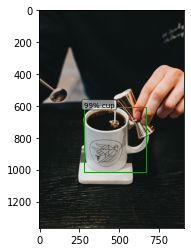

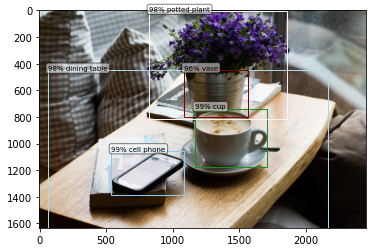

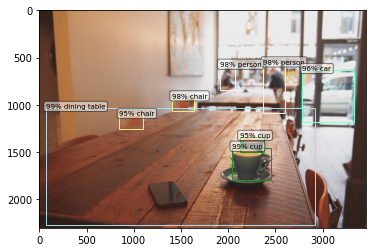

In [6]:
# Get the text name for each label as an integer
COCO_NAMES = ['background']
label_names = urllib.request.urlopen('https://raw.githubusercontent.com/gabilodeau/INF6804/master/utils/coco-labels.txt')
for label_name in label_names.readlines():
  COCO_NAMES.append(label_name.strip().decode('UTF-8'))

# Get some colors to display each label with a different one
COLORS = list(mcolors.CSS4_COLORS.values())

# For each image, display their predictions
for i, prediction in enumerate(predictions):
  boxes = []
  for j, score in enumerate(prediction['scores']):
      if score >= THRESHOLD:
          boxes.append(prediction['boxes'][j].tolist() + [prediction['labels'][j].tolist()] + [score.tolist()])
  img = np.array(io.imread(os.path.join(IMG_BASE_DIR, IMG_NAMES[i])), dtype=np.uint8)
  fig, ax = plt.subplots(1)
  ax.imshow(img)

  for box in boxes:
      x0, y0, x1, y1, label, score = box
      rect = patches.Rectangle((x0, y0), (x1-x0), (y1-y0), linewidth=1, edgecolor=COLORS[label], facecolor='none')
      plt.text(x0, y0, str(int(score*100)) + '% ' + COCO_NAMES[label], color='k', fontsize=7,
                bbox=dict(facecolor='white', alpha=0.5, boxstyle='round'))
      ax.add_patch(rect)

  plt.show()